### Fraud transaction detection (Credit Card Transactions)

##### About Data Set:

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 30th June 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

We are going to work on Fraud_Test dataset (as Fraud train dataset is already huge) and will build a model to detect credit card frauds which saves a lot of money and be less risk for banks.



In [96]:
#Importing the Required Librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [97]:
# We are using Fraud_test dataset as a whole and dropping 1st column 'Unnamed' as it was irrelevant

df=pd.read_csv(r'fraudTest.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,31-12-2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13-02-1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31-12-2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27-12-1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31-12-2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29-11-1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31-12-2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15-12-1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


### Inspecting Data

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [99]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [100]:
#Checking null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### No Null values in our data

In [101]:
df.shape

(555719, 23)

### Distribution of Dependent Variable

In [102]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [103]:
df['is_fraud'].value_counts(normalize=True)*100

is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64

This is highly imbalanced class data, so later we need to balance the dependent variable

In [104]:
#Finding unique values in each column
df.nunique()

Unnamed: 0               555719
trans_date_trans_time    226976
cc_num                      904
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

### Converting data type of trans_date_trans_time to datetime

In [105]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [106]:
df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

### Deriving 'Transaction Hour' Feature from 'Transaction Time' Feature

In [107]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0         12
1         12
2         12
3         12
4         12
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 555719, dtype: int32

### Deriving 'Day of Week' Feature from 'Transaction Time' Feature

In [108]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 555719, dtype: object

In [109]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,Sunday
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,Sunday


### Deriving 'Year Month' Feature from 'Transaction Time' Feature


In [110]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0         2020-06
1         2020-06
2         2020-06
3         2020-06
4         2020-06
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 555719, dtype: period[M]

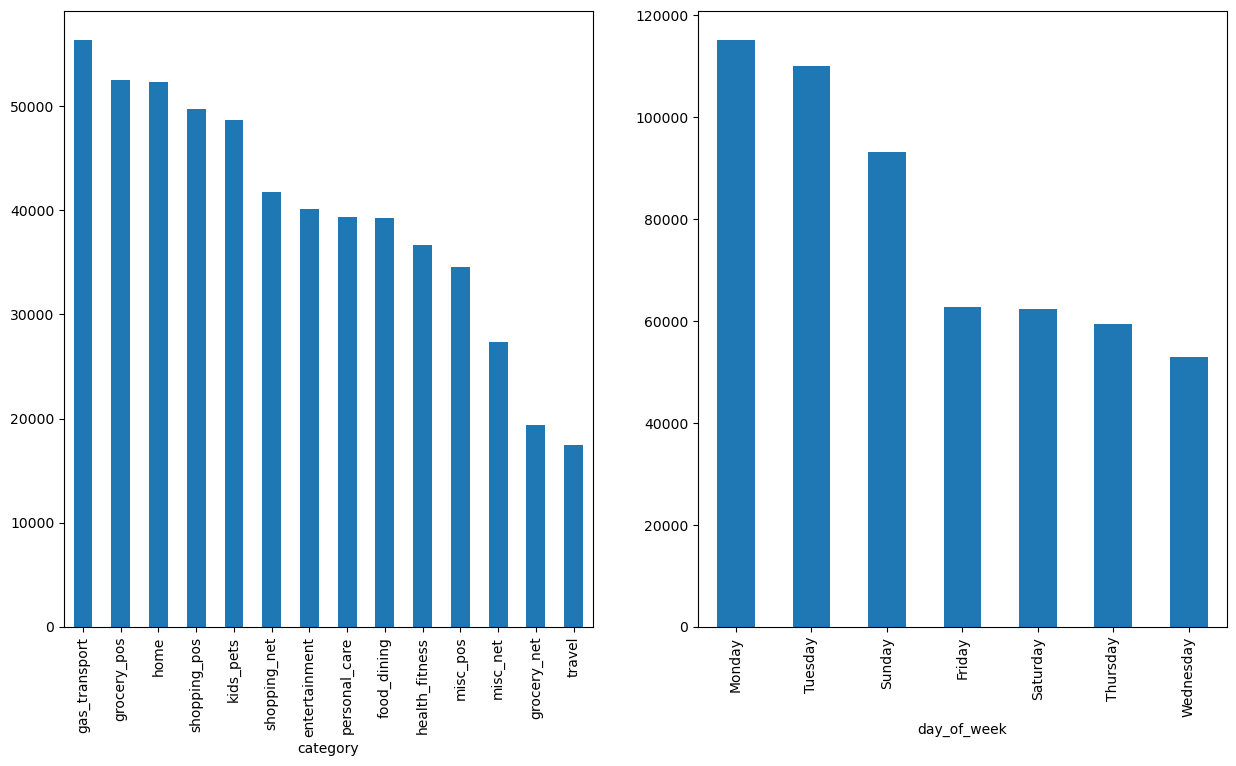

In [111]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();


- Monday and Tuesday of the week have highest credit card transactions
- gas_transport and grocery_pos have highest credit card transactions

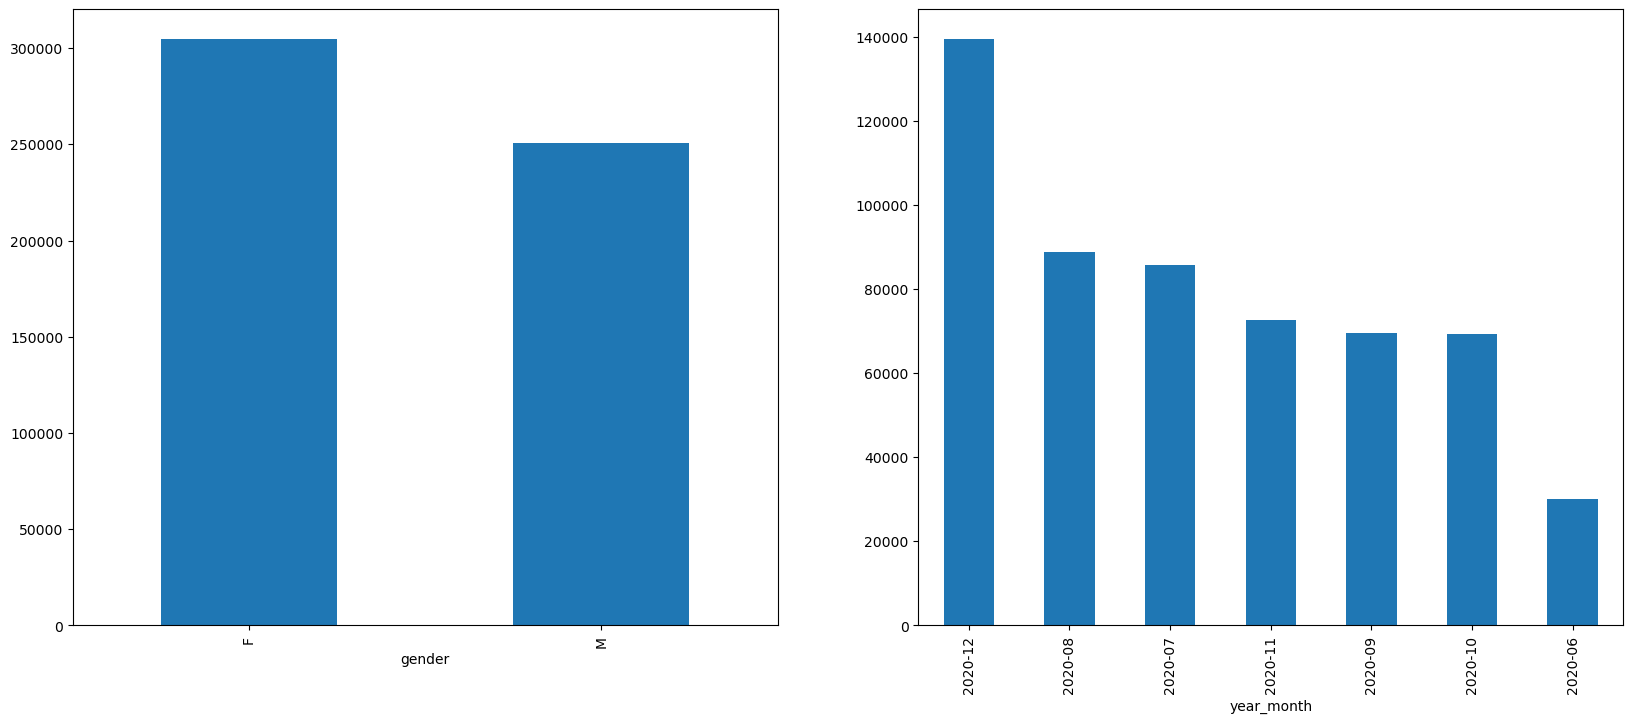

In [112]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();


- Highest number of Transactions are in month of December and Lowest number of Transactions happened in February.

### Derive Age of the Customer:

Age of Customer = Transaction Date - DOB

In [113]:

df['dob'] = pd.to_datetime(df['dob'])
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


df['age'] = np.round((df['trans_date_trans_time'] - df['dob']).dt.days / 365.25)


print(df['age'].describe())

count    555719.000000
mean         46.885075
std          17.433862
min          15.000000
25%          33.000000
50%          45.000000
75%          58.000000
max          96.000000
Name: age, dtype: float64


In [114]:
## 33-58 aged people are 50% of our customers

print("Minimum age of customer is", df['age'].min())
print("Maximum age of customer is", df['age'].max())

Minimum age of customer is 15.0
Maximum age of customer is 96.0


### Deriving counts for each state and Job category

In [115]:
df.state.value_counts()

state
TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: count, dtype: int64

In [116]:
df.job.value_counts()

job
Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: count, Length: 478, dtype: int64

##### Distribution of amt

In [117]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amount Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amount Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amount Distribution'})],
axis=1
)

,Row Type,Overall Amount Distribution,Non Fraud Amount Distribution,Fraud Amount Distribution
0,count,555719.000000,553574.000000,2145.000000
1,mean,69.392810,67.614408,528.356494
2,std,156.745941,152.471931,392.747594
3,min,1.000000,1.000000,1.780000
4,50%,47.290000,47.150000,371.940000
5,95%,193.051000,188.870000,1084.108000
6,99.9%,1572.723500,1575.960200,1311.443760
7,max,22768.110000,22768.110000,1320.920000


Fraud Transaction mean is way higher than non-fraud transaction

Mean of Non Fraud Transactions: 67.6

Mean of Fraud Transactions: 528.3

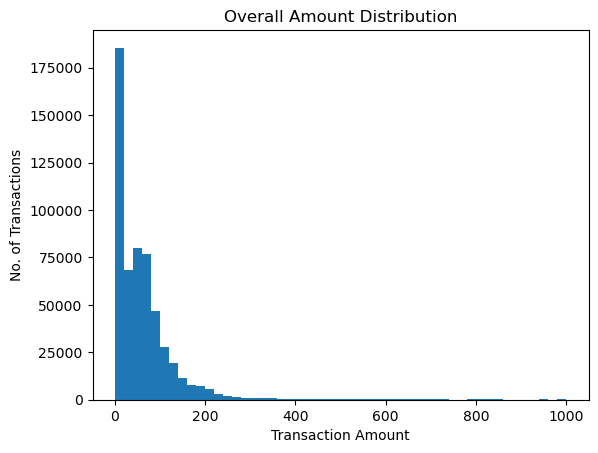

In [118]:
plt.hist(df[df['amt']<=1000]['amt'], bins=50)
plt.title('Overall Amount Distribution');

plt.xlabel('Transaction Amount')
plt.ylabel('No. of Transactions')

plt.show();

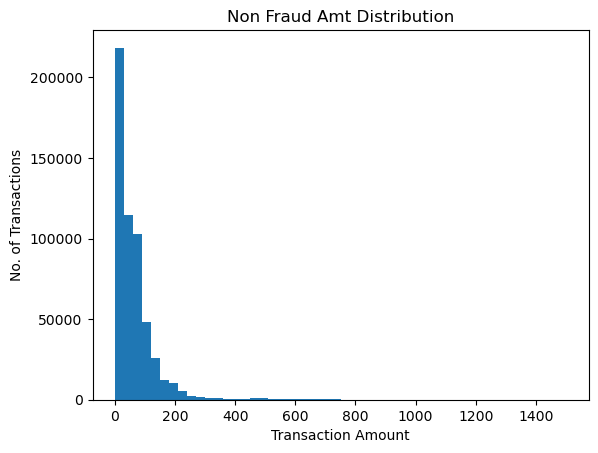

In [119]:
plt.hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
plt.title('Non Fraud Amt Distribution');

plt.xlabel('Transaction Amount')
plt.ylabel('No. of Transactions')

plt.show();

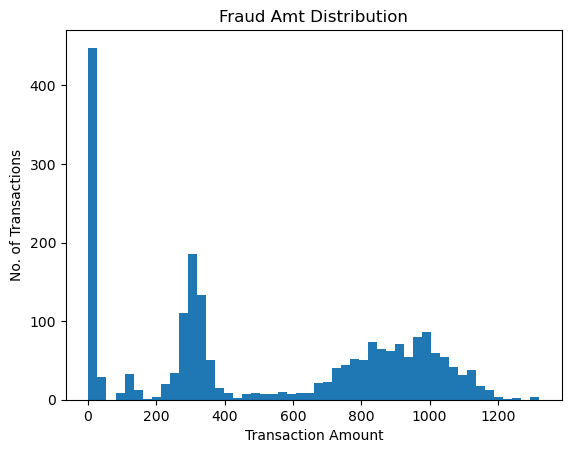

In [120]:
plt.hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)
plt.title('Fraud Amt Distribution')

plt.xlabel('Transaction Amount')
plt.ylabel('No. of Transactions')

plt.show();

<Axes: ylabel='amt'>

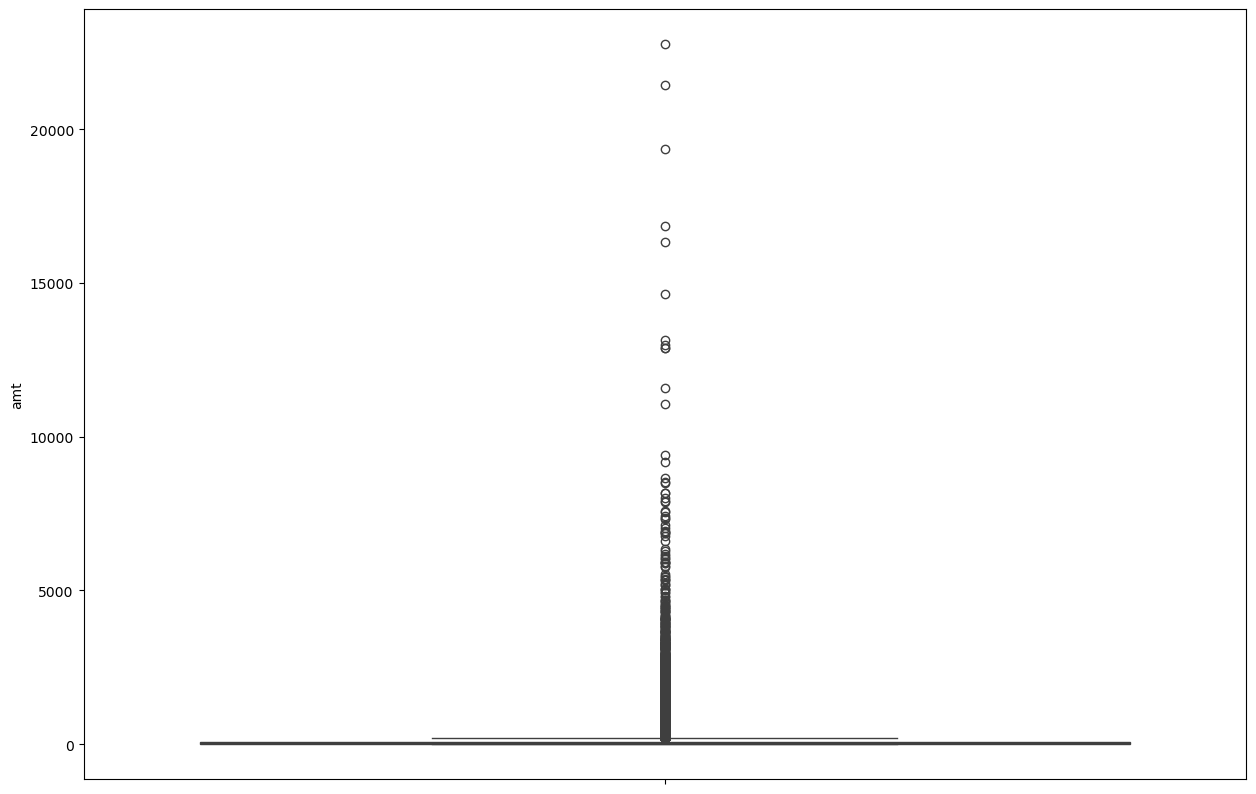

In [121]:
plt.figure(figsize=[15,10])
sns.boxplot(df['amt'])

<Axes: >

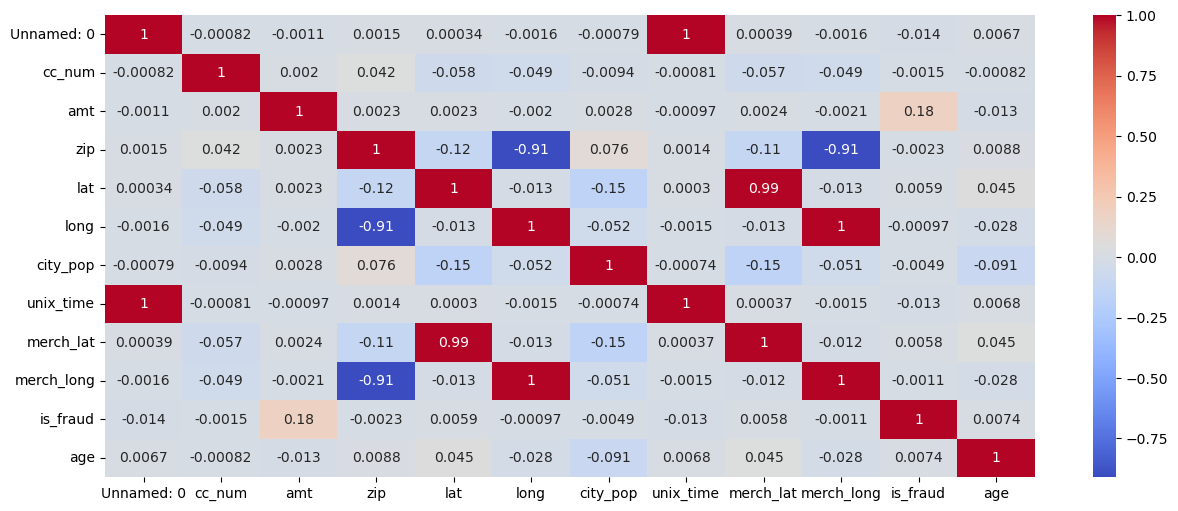

In [122]:
plt.figure(figsize=(15,6))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), annot=True, cmap='coolwarm') #plot correlation plot for numerical data + encoded columns

## Treating outliers:

In [123]:
df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_hour                        int32
day_of_week                      object


In [124]:
df100 = df.select_dtypes(include=['float64','int64'])

In [125]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  555719 non-null  int64  
 1   cc_num      555719 non-null  float64
 2   amt         555719 non-null  float64
 3   zip         555719 non-null  int64  
 4   lat         555719 non-null  float64
 5   long        555719 non-null  float64
 6   city_pop    555719 non-null  int64  
 7   unix_time   555719 non-null  int64  
 8   merch_lat   555719 non-null  float64
 9   merch_long  555719 non-null  float64
 10  is_fraud    555719 non-null  int64  
 11  age         555719 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 50.9 MB


In [126]:
Q1 = df100.quantile(0.25)
Q3 = df100.quantile(0.75)

IQR = Q3 - Q1

find_outliers = ((df100 < (Q1 - 1.5*IQR)) | (df100 > (Q3 + 1.5*IQR))).any(axis = 1)

print(df100.shape)
print(df100[~find_outliers].shape)

df100 = df100[~find_outliers]

(555719, 12)
(377650, 12)


In [127]:
df.std()

TypeError: could not convert string to float: 'fraud_Kirlin and Sons'

In [ ]:
df.columns

## Dropping irrelevant columns:

In [128]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_hour', 'day_of_week',
       'year_month', 'age'],
      dtype='object')

In [129]:
df.head(3)
#date cate
#ccnum num
#mer cate 
#cate ohe
#amt num
#name cate
#gen ohe
#street cate
#city ohe
#state ohe
#citypop num
#job ohe
#dob date
#3 col has many string data,remove them or label encode them like street,merchent,name,trans_num

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday,2020-06,52.0
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday,2020-06,30.0
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday,2020-06,50.0


In [ ]:
df.drop(columns=['zip', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'city_pop',
       'job', 'dob', 'trans_num', 'is_fraud', 'trans_hour', 'day_of_week',
       'year_month', 'age'],
      dtype='object')

#### Gender

In [ ]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

,Gender,gender_count,percent
0,F,304886,54.863339
1,M,250833,45.136661


Females customers are higher than male

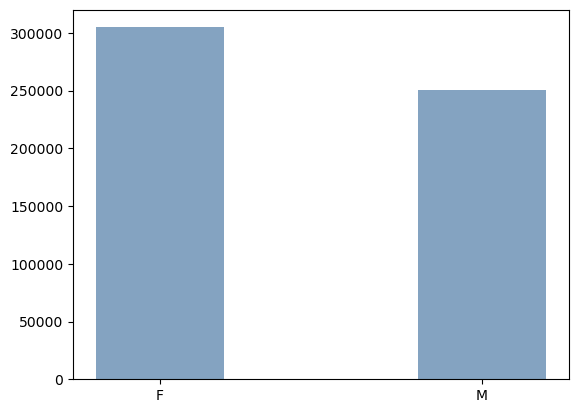

In [ ]:
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6),
        width = 0.4)

plt.show()

In [ ]:
pd.crosstab(df['gender'], df['is_fraud'])

is_fraud,0,1
gender,,
F,303722,1164
M,249852,981


<Axes: xlabel='gender'>

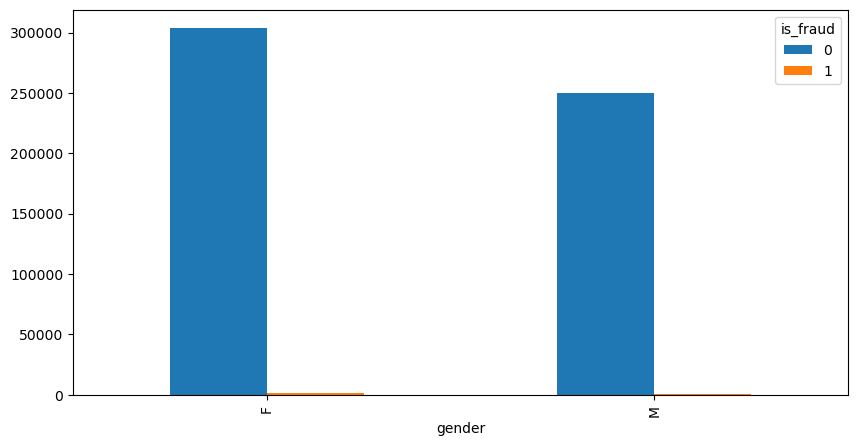

In [ ]:
pd.crosstab(df['gender'], df['is_fraud']).plot(kind='bar', figsize=(10,5))

In [ ]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0,303722,304886,99.618218
1,F,1,1164,304886,0.381782
2,M,0,249852,250833,99.608903
3,M,1,981,250833,0.391097


##### Category

In [ ]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,56370,10.143616
4,grocery_pos,52553,9.456758
6,home,52345,9.419329
12,shopping_pos,49791,8.959744
7,kids_pets,48692,8.761982
11,shopping_net,41779,7.518008
0,entertainment,40104,7.216597
10,personal_care,39327,7.076778
1,food_dining,39268,7.066161
5,health_fitness,36674,6.599378


Gas_transport holds for the maximum no.of the transactions

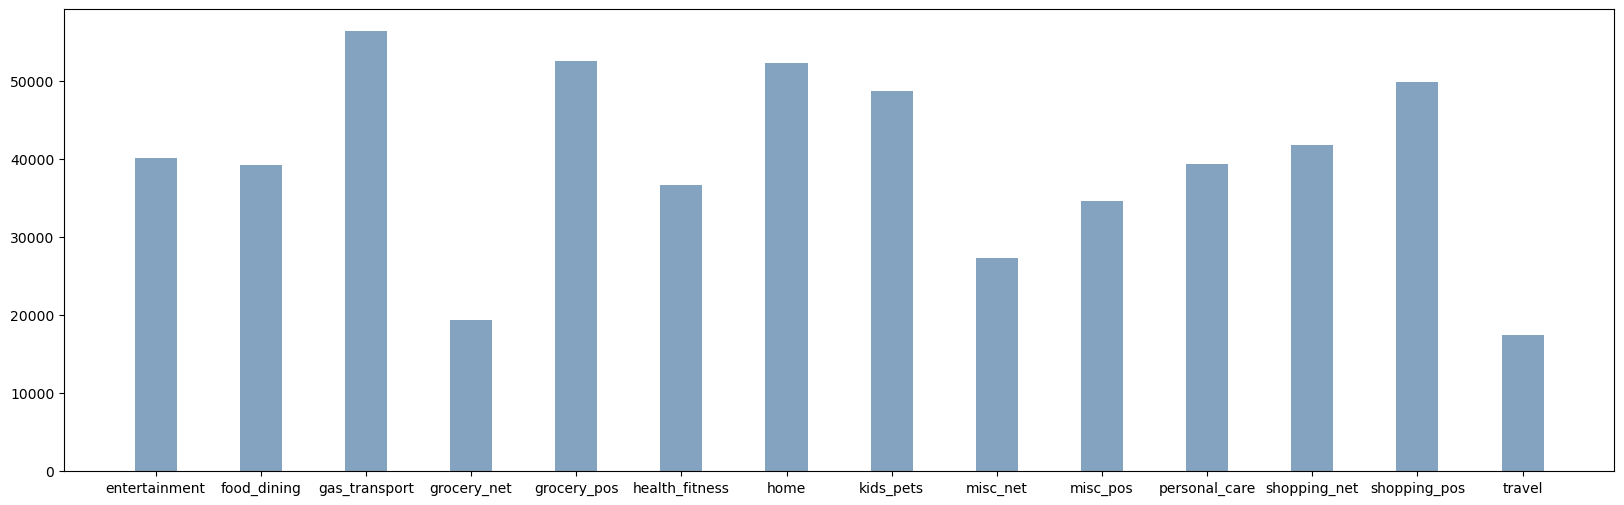

In [ ]:
fig = plt.figure(figsize = (20, 6))


plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),
        width = 0.4)

plt.show()

In [ ]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100


In [ ]:
df_fraud_category.sort_values(by = ['count'], ascending=True)

,Category,is_fraud,count,category_count,percent,percent_grp
27,travel,1,40,17449,3.139896,0.229239
7,grocery_net,1,41,19426,3.495652,0.211057
11,health_fitness,1,52,36674,6.599378,0.141790
3,food_dining,1,54,39268,7.066161,0.137517
1,entertainment,1,59,40104,7.216597,0.147117
15,kids_pets,1,65,48692,8.761982,0.133492
13,home,1,67,52345,9.419329,0.127997
21,personal_care,1,70,39327,7.076778,0.177995
19,misc_pos,1,72,34574,6.221490,0.208249
5,gas_transport,1,154,56370,10.143616,0.273195


#### grocery_pos and shopping_net has more number of fraud transactions compared to other categories

In [ ]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
13,home,1,67,52345,9.419329,0.127997
15,kids_pets,1,65,48692,8.761982,0.133492
3,food_dining,1,54,39268,7.066161,0.137517
11,health_fitness,1,52,36674,6.599378,0.141790
1,entertainment,1,59,40104,7.216597,0.147117
21,personal_care,1,70,39327,7.076778,0.177995
19,misc_pos,1,72,34574,6.221490,0.208249
7,grocery_net,1,41,19426,3.495652,0.211057
27,travel,1,40,17449,3.139896,0.229239
5,gas_transport,1,154,56370,10.143616,0.273195


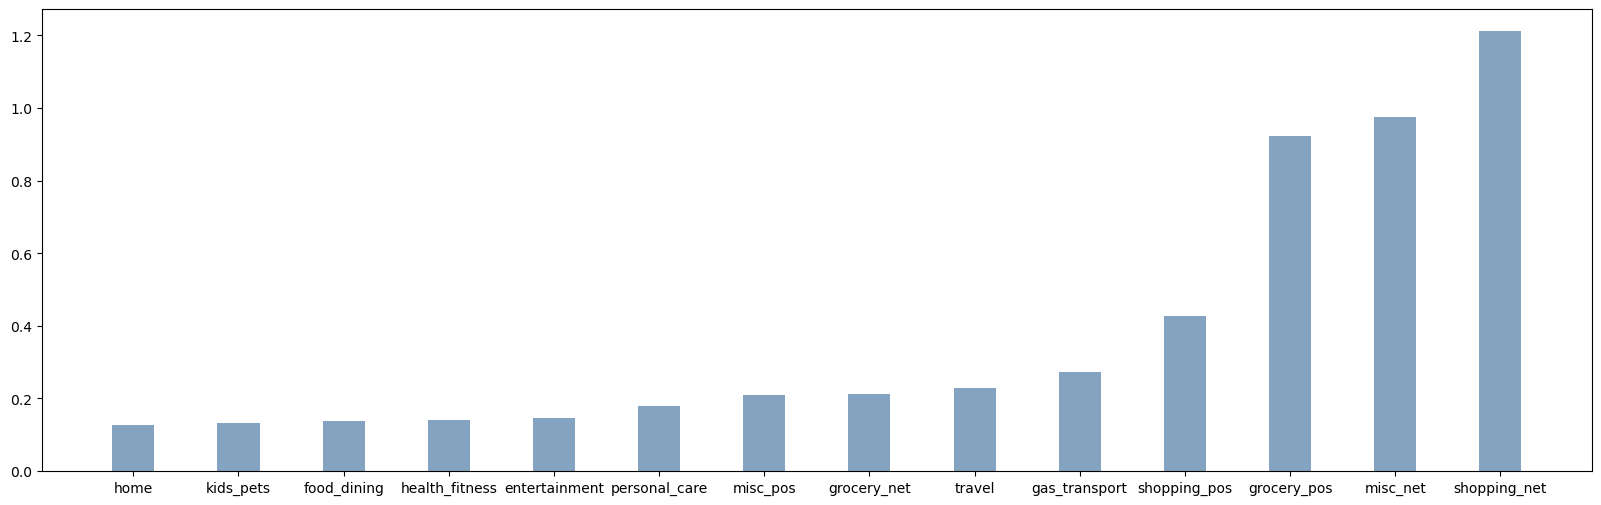

In [ ]:
fig = plt.figure(figsize = (20, 6))


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),
        width = 0.4)

plt.show()

### According to the percentage group, Shopping net and Misc_net have highest no. of fraud transactions.

##### Merchant

In [ ]:
df.merchant.value_counts(normalize=True, ascending=False)

merchant
fraud_Kilback LLC                        0.003345
fraud_Cormier LLC                        0.002874
fraud_Schumm PLC                         0.002809
fraud_Kuhn LLC                           0.002737
fraud_Dickinson Ltd                      0.002733
                                           ...   
fraud_Treutel-King                       0.000581
fraud_Satterfield-Lowe                   0.000574
fraud_Kessler Group                      0.000572
fraud_Jerde-Hermann                      0.000561
fraud_Ritchie, Bradtke and Stiedemann    0.000547
Name: proportion, Length: 693, dtype: float64

In [ ]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

,Merchant,merchant_count,percent
316,fraud_Kilback LLC,1859,0.334522
105,fraud_Cormier LLC,1597,0.287375
571,fraud_Schumm PLC,1561,0.280897
349,fraud_Kuhn LLC,1521,0.273699
136,fraud_Dickinson Ltd,1519,0.273340
...,...,...,...
633,fraud_Treutel-King,323,0.058123
544,fraud_Satterfield-Lowe,319,0.057403
306,fraud_Kessler Group,318,0.057223
286,fraud_Jerde-Hermann,312,0.056143


In [ ]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [ ]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

,Merchant,is_fraud,count,merchant_count,percent,percent_grp
957,"fraud_Romaguera, Cruickshank and Greenholt",1,18,828,0.148996,2.173913
703,fraud_Lemke-Gutmann,1,18,837,0.150616,2.150538
805,"fraud_Mosciski, Ziemann and Farrell",1,18,870,0.156554,2.068966
439,"fraud_Heathcote, Yost and Kertzmann",1,17,830,0.149356,2.048193
947,"fraud_Rodriguez, Yost and Jenkins",1,10,501,0.090153,1.996008
...,...,...,...,...,...,...
708,"fraud_Lind, Huel and McClure",1,1,1125,0.202440,0.088889
425,fraud_Harris Inc,1,1,1138,0.204780,0.087873
902,"fraud_Raynor, Feest and Miller",1,1,1152,0.207299,0.086806
994,"fraud_Schaefer, McGlynn and Bosco",1,1,1163,0.209278,0.085985


##### One Hot-Encoding

In [ ]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='day_of_week', drop_first=True)

In [ ]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [ ]:
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,False,False,False,True,False,False,True,False,False,False
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,False,False,False,False,False,False,True,False,False,False
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,False,False,False,False,False,False,True,False,False,False
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,False,False,False,True,False,False,True,False,False,False
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,False,False,True,True,False,False,True,False,False,False


In [ ]:
df1.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'city_pop',
       'job', 'dob', 'trans_num', 'is_fraud', 'trans_hour', 'day_of_week',
       'year_month', 'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'],
      dtype='object')

##### Test-Train Split

In [ ]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday']

Y_cols = ['is_fraud']

In [ ]:
#Importing Library
from sklearn.model_selection import train_test_split

##### Oversampling

In [ ]:
#As this dataset is highly imbalance we have to balance this by over sampling
cnt_non_fraud = df1[df1['is_fraud'] == 0]['amt'].count()
df1_class_fraud = df1[df1['is_fraud'] == 1]
df1_class_nonfraud = df1[df1['is_fraud'] == 0]

In [ ]:
#OverSampling
df1_class_fraud_oversample = df1_class_fraud.sample(cnt_non_fraud, replace=True)
df1_oversampled = pd.concat([df1_class_nonfraud, df1_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df1_oversampled['is_fraud'].value_counts())

Random over-sampling:
is_fraud
0    553574
1    553574
Name: count, dtype: int64


In [ ]:
df1_oversampled.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,False,False,False,True,False,False,True,False,False,False
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,False,False,False,False,False,False,True,False,False,False
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,False,False,False,False,False,False,True,False,False,False
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,False,False,False,True,False,False,True,False,False,False
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,False,False,True,True,False,False,True,False,False,False


####  Train and test split

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df1_oversampled[X_cols],df1_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(775003, 24)

In [ ]:
X_test.shape

(332145, 24)

#### Logistic Regression

In [ ]:
#Importing Library
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(random_state=42)

In [ ]:
#Building Logistic Regression  Model

logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[359305  28280]
 [ 99230 288188]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    387585
           1       0.91      0.74      0.82    387418

    accuracy                           0.84    775003
   macro avg       0.85      0.84      0.83    775003
weighted avg       0.85      0.84      0.83    775003



In [ ]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[153772  12217]
 [ 42523 123633]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    165989
           1       0.91      0.74      0.82    166156

    accuracy                           0.84    332145
   macro avg       0.85      0.84      0.83    332145
weighted avg       0.85      0.84      0.83    332145



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(splitter= 'best', min_samples_split= 5, min_samples_leaf=2, max_depth=30, criterion='entropy')
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.9993015098827319

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[165757,    232],
       [     0, 166156]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    165989\n           1       1.00      1.00      1.00    166156\n\n    accuracy                           1.00    332145\n   macro avg       1.00      1.00      1.00    332145\nweighted avg       1.00      1.00      1.00    332145\n'

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# params_dist={'criterion': ['gini', 'entropy'],'splitter': ['best', 'random'],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
# rscv=RandomizedSearchCV(tree,params_dist,cv=5)
# rscv.fit(X_train,y_train)
# print("best_score:",rscv.best_score_)
# print("best_params:",rscv.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rndf=RandomForestClassifier()
rndf.fit(X_train,y_train)
y_pred=rndf.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.9998434418702675

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[165937,     52],
       [     0, 166156]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    165989\n           1       1.00      1.00      1.00    166156\n\n    accuracy                           1.00    332145\n   macro avg       1.00      1.00      1.00    332145\nweighted avg       1.00      1.00      1.00    332145\n'

In [ ]:
import pickle


with open('model.pkl', 'wb') as file:
    pickle.dump(rndf, file)

##### Logistic Regression model results:

Training data:

Accuracy - 85%

recall   - 84%

Testing data:

Accuracy - 85%

recall   - 84%

Model : Decision Tree

accuracy:99

precision:100

recall:100

f1-score:100

Model: RandomForest

accuracy:99

precision:100

recall:100

f1-score:100

### ANN Implementation

#### Importing Required Libraries

In [131]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

#### Load and Preprocess Data

In [133]:
df = pd.read_csv(r'D:\SEP 2024 PROJECTS\EZHIL\INTERMEDIATE\Comprehensive Detection and Analysis of Anomalous Financial Transactions\fraudTest.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,31-12-2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13-02-1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31-12-2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27-12-1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31-12-2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29-11-1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31-12-2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15-12-1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [ ]:
df.dtypes 

merchant       object
category       object
amt           float64
first          object
last           object
gender         object
lat           float64
long          float64
city_pop        int64
job            object
dob            object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [142]:
df.columns

Index(['merchant', 'category', 'amt', 'first', 'last', 'gender', 'lat', 'long',
       'city_pop', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

In [168]:
df

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2.86,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,29.84,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,41.28,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,60.05,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3.19,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...
555714,43.77,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,111.84,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,86.88,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,7.99,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [159]:
# Check for missing values
print(df.isnull().sum())

# df = df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'trans_num'])
# 'street', 'city', 'state', 'zip',
# df = df.drop(columns=['job', 'dob', 'merchant', 'category', 'first', 'last', 'gender'])

# Standardization (ANN works better with normalized data)
scaler = StandardScaler()
X= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split features and target 
X = df.drop(columns=['is_fraud'])  # Features
y = df['is_fraud']  # Target: 0 (Normal), 1 (Fraud)

# Train-Test Split (80-20)



amt           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64


In [160]:
# Define the ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dropout(0.3),
    Dense(16, activation='relu'),  # Hidden Layer 1
    Dropout(0.3),
    Dense(8, activation='relu'),   # Hidden Layer 2
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Output Layer (Binary Classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [166]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train the ANN again
model.fit(X_train, y_train, epochs=2, batch_size=32,steps_per_epoch=5, validation_data=(X_test, y_test))

Epoch 1/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5335 - loss: 60608192.0000 - val_accuracy: 0.5000 - val_loss: 16275542.0000
Epoch 2/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4887 - loss: 57707520.0000 - val_accuracy: 0.5000 - val_loss: 4528237.0000


In [154]:
# Train the ANN model
history = model.fit(X_train, y_train, epochs=2, batch_size=32, steps_per_epoch=3, validation_data=(X_test, y_test))

Epoch 1/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 0.1393 - val_accuracy: 0.9961 - val_loss: 0.1457
Epoch 2/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.9909 - loss: 0.1549 - val_accuracy: 0.9961 - val_loss: 0.1452


In [167]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred))

6920/6920 ━━━━━━━━━━━━━━━━━━━━ 6s 862us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    110715
           1       0.50      1.00      0.67    110715

    accuracy                           0.50    221430
   macro avg       0.25      0.50      0.33    221430
weighted avg       0.25      0.50      0.33    221430



In [176]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

# Load and Preprocess Dataset
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    
    columns_to_drop = [
        'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'trans_num',
        'street', 'city', 'state', 'zip', 'job', 'dob', 'merchant',
        'category', 'first', 'last', 'gender'
    ]
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    
    print("Dataset shape:", df.shape)
    print("\nMissing Values:\n", df.isnull().sum())
    
    return df

# Prepare Features and Target
def prepare_data(df):
    X = df.drop(columns=['is_fraud']).values  # Convert to numpy array
    y = df['is_fraud'].values.astype(np.int32)  # Convert to numpy array with explicit type
    
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Print class distribution
    print("\nOriginal class distribution:")
    print(np.bincount(y) / len(y))
    print("\nResampled class distribution:")
    print(np.bincount(y_resampled) / len(y_resampled))
    
    return X_resampled, y_resampled

# Split and Scale Data
def split_and_scale_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Ensure numpy arrays
    y_train = np.array(y_train, dtype=np.int32)
    y_test = np.array(y_test, dtype=np.int32)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )
    
    return model

def train_model(X_train, y_train, X_test, y_test, input_dim):
    # Build model
    model = build_model(input_dim)
    
    # Compute class weights using numpy arrays
    unique_classes = np.array([0, 1])
    class_weights = compute_class_weight(
        class_weight="balanced",
        classes=unique_classes,
        y=y_train
    )
    class_weight_dict = dict(zip(unique_classes, class_weights))
    print("\nClass Weights:", class_weight_dict)
    
    # Early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test, y_test),  # Use validation_data instead of validation_split
        class_weight=class_weight_dict,
        callbacks=[early_stopping],
        verbose=1
    )
    
    return model, history

def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.3).astype(int)
    
    # Print metrics
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

def main():
    # Load and preprocess data
    df = load_and_preprocess_data(r"C:\Users\avine\Downloads\fraudTest.csv")
    
    # Prepare features and target
    X_resampled, y_resampled = prepare_data(df)
    
    # Split and scale data
    X_train, X_test, y_train, y_test = split_and_scale_data(X_resampled, y_resampled)
    
    # Train model
    model, history = train_model(X_train, y_train, X_test, y_test, X_train.shape[1])
    
    # Evaluate model
    evaluate_model(model, X_test, y_test)
    
    return model, history

if __name__ == "__main__":
    model, history = main()

Dataset shape: (555719, 8)

Missing Values:
 amt           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

Original class distribution:
[0.99614014 0.00385986]

Resampled class distribution:
[0.5 0.5]

Class Weights: {0: 1.0, 1: 1.0}
Epoch 1/10
27679/27679 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.8784 - auc_1: 0.9223 - loss: 0.3232 - val_accuracy: 0.8914 - val_auc_1: 0.9470 - val_loss: 0.2787
Epoch 2/10
27679/27679 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.8879 - auc_1: 0.9399 - loss: 0.2887 - val_accuracy: 0.8942 - val_auc_1: 0.9522 - val_loss: 0.2663
Epoch 3/10
27679/27679 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.8899 - auc_1: 0.9454 - loss: 0.2792 - val_accuracy: 0.8970 - val_auc_1: 0.9568 - val_loss: 0.2584
Epoch 4/10
27679/27679 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.8906 - auc_1: 0.9469 - loss: 0.2761 - val_accuracy: 0.8965 - val_auc_1: 0.9588 - val_loss: 0.2564
Epoch 5/10

In [ ]:
'''Conclusion:
Random forest model is the best model.It has high test accuracy,least false negatives,least
false positives,high roc auc score,recall and precision values close to 1 respectively.'''